In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [4]:
df_fair = sm.datasets.fair.load_pandas().data
df_fair_sample = df_fair.sample(frac=0.1, random_state=20190425)

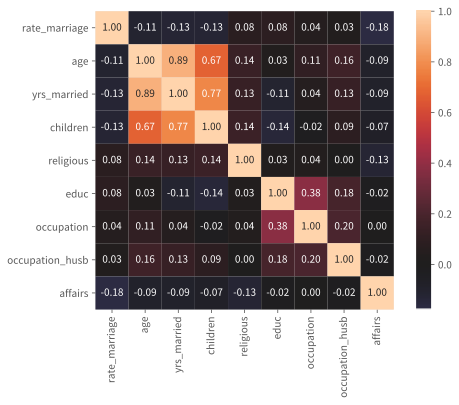

In [5]:
df = df_fair
sns.heatmap(df.corr(), center=0, square=True, annot=True, fmt='.2f')

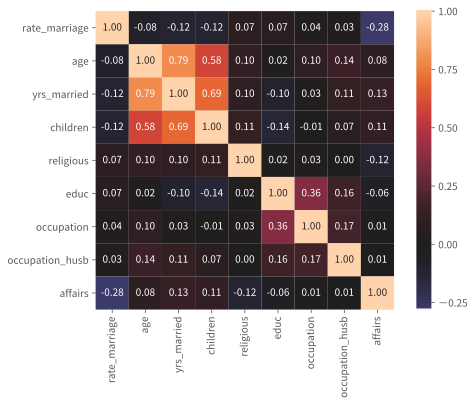

In [6]:
df = df_fair
sns.heatmap(df.corr('kendall'), center=0, square=True, annot=True, fmt='.2f')

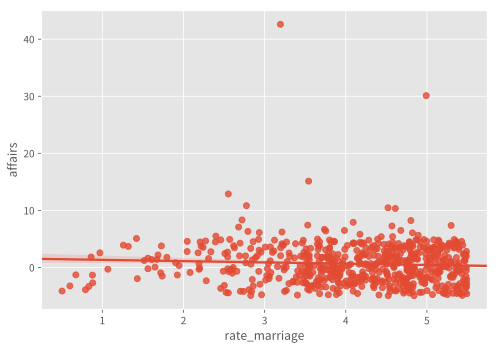

In [7]:
df = df_fair_sample
sns.regplot(
    data=df, x='rate_marriage', y='affairs',
    x_jitter=1/2, y_jitter=10/2,
)

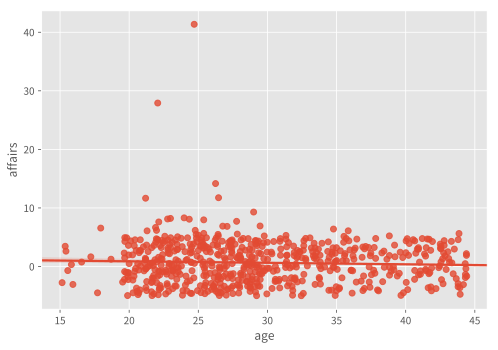

In [8]:
df = df_fair_sample
sns.regplot(
    data=df, x='age', y='affairs',
    x_jitter=5/2, y_jitter=10/2,
)

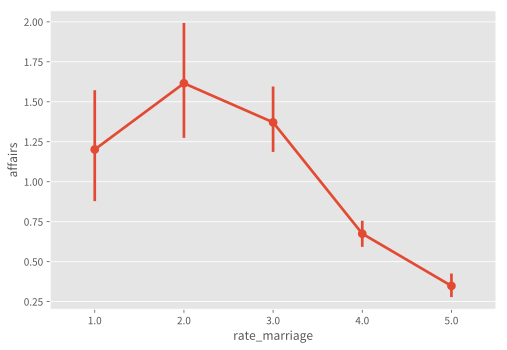

In [9]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs')

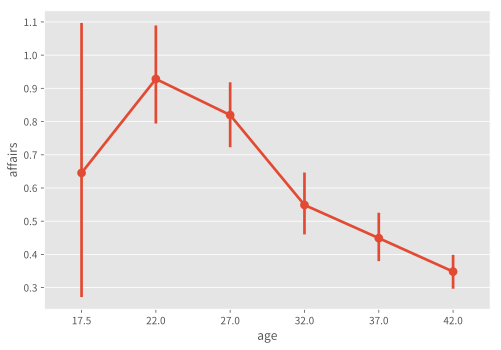

In [10]:
df = df_fair
sns.pointplot(data=df, x='age', y='affairs')

In [11]:
df = df_fair
smf.ols('affairs ~ rate_marriage', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     208.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.66e-46
Time:                        23:11:05   Log-Likelihood:                -13959.
No. Observations:                6366   AIC:                         2.792e+04
Df Residuals:                    6364   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3825      0.119     19.969      0.000       2.149       2.616
rate_marriage    -0.4081      0.028    -14.436      0.000      -0.464      -0.353
==============================================================================
Omnibus:                     9443.528   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5215639.758
Skew:                           8.930   Prob(JB):                         0.00
Kurtosis:                     142.083   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.25e-48
Time:                        23:11:05   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[T.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage)[T.3.0]     0.1696      0.228      0.743      0.457      -0.278       0.617
C(rate_marriage)[T.4.0]    -0.5268      0.222     -2.370      0.018      -0.963      -0.091
C(rate_marriage)[T.5.0]    -0.8535      0.222     -3.853      0.000      -1.288      -0.419
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage, Treatment(reference=3))', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.25e-48
Time:                        23:11:05   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           1.3713      0.069     19.963      0.000       1.237       1.506
C(rate_marriage, Treatment(reference=3))[T.1.0]    -0.1696      0.228     -0.743      0.457      -0.617       0.278
C(rate_marriage, Treatment(reference=3))[T.2.0]     0.2445      0.135      1.813      0.070      -0.020       0.509
C(rate_marriage, Treatment(reference=3))[T.4.0]    -0.6964      0.083     -8.441      0.000      -0.858      -0.535
C(rate_marriage, Treatment(reference=3))[T.5.0]    -1.0231      0.080    -12.725      0.000      -1.181      -0.865
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df = df_fair
smf.ols('affairs ~ 0 + C(rate_marriage, Diff)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.25e-48
Time:                        23:11:05   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(rate_marriage, Diff)[D.1.0]     1.0423      0.053     19.791      0.000       0.939       1.146
C(rate_marriage, Diff)[D.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage, Diff)[D.3.0]    -0.2445      0.135     -1.813      0.070      -0.509       0.020
C(rate_marriage, Diff)[D.4.0]    -0.6964      0.083     -8.441      0.000      -0.858      -0.535
C(rate_marriage, Diff)[D.5.0]    -0.3267      0.062     -5.275      0.000      -0.448      -0.205
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage, Sum)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.25e-48
Time:                        23:11:05   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.0423      0.053     19.791      0.000       0.939       1.146
C(rate_marriage, Sum)[S.1.0]     0.1593      0.177      0.902      0.367      -0.187       0.505
C(rate_marriage, Sum)[S.2.0]     0.5734      0.104      5.504      0.000       0.369       0.778
C(rate_marriage, Sum)[S.3.0]     0.3289      0.075      4.394      0.000       0.182       0.476
C(rate_marriage, Sum)[S.4.0]    -0.3675      0.063     -5.791      0.000      -0.492      -0.243
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df = df_fair
smf.ols('affairs ~ C(age)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.81
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.16e-11
Time:                        23:11:05   Log-Likelihood:                -14032.
No. Observations:                6366   AIC:                         2.808e+04
Df Residuals:                    6360   BIC:                         2.812e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6453      0.186      3.468      0.001       0.281       1.010
C(age)[T.22.0]     0.2830      0.193      1.465      0.143      -0.096       0.662
C(age)[T.27.0]     0.1742      0.193      0.904      0.366      -0.203       0.552
C(age)[T.32.0]    -0.0965      0.198     -0.488      0.626      -0.484       0.291
C(age)[T.37.0]    -0.1964      0.205     -0.956      0.339      -0.599       0.206
C(age)[T.42.0]    -0.2972      0.202     -1.473      0.141      -0.693       0.098
==============================================================================
Omnibus:                     9302.228   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4681262.758
Skew:                           8.697   Prob(JB):                         0.00
Kurtosis:                     134.704   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df = df_fair
smf.ols('affairs ~ C(age, Diff)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.81
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.16e-11
Time:                        23:11:05   Log-Likelihood:                -14032.
No. Observations:                6366   AIC:                         2.808e+04
Df Residuals:                    6360   BIC:                         2.812e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6231      0.040     15.529      0.000       0.544       0.702
C(age, Diff)[D.17.5]     0.2830      0.193      1.465      0.143      -0.096       0.662
C(age, Diff)[D.22.0]    -0.1087      0.072     -1.513      0.130      -0.250       0.032
C(age, Diff)[D.27.0]    -0.2708      0.084     -3.237      0.001      -0.435      -0.107
C(age, Diff)[D.32.0]    -0.0999      0.110     -0.908      0.364      -0.316       0.116
C(age, Diff)[D.37.0]    -0.1008      0.117     -0.862      0.389      -0.330       0.128
==============================================================================
Omnibus:                     9302.228   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4681262.758
Skew:                           8.697   Prob(JB):                         0.00
Kurtosis:                     134.704   Cond. No.                         7.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""